
## 📘 Introducción al problema de clasificación multiclase con el dataset Iris

En este ejemplo trabajaremos con el famoso dataset **Iris**, una base de datos muy conocida en la historia de la estadística y el aprendizaje automático. Fue introducido por el estadístico Ronald A. Fisher en 1936 y es un excelente punto de partida para entender los problemas de **clasificación multiclase**.

### 🌸 El problema

Dado un conjunto de características físicas de flores (largo y ancho de sépalos y pétalos), el objetivo es predecir a cuál de las **tres especies de Iris** pertenece cada flor:

* **Iris setosa**
* **Iris versicolor**
* **Iris virginica**

Es decir, no tenemos solo dos clases (como en los problemas binarios vistos anteriormente), sino **tres posibles etiquetas**. Esto nos permite introducir nuevos conceptos y ver cómo se adaptan los modelos y métricas a un entorno multiclase.

---

### 📊 Información sobre el dataset

* **Cantidad de muestras (filas)**: 150
* **Cantidad de características (columnas)**: 4

  * `sepal length (cm)`
  * `sepal width (cm)`
  * `petal length (cm)`
  * `petal width (cm)`
* **Clases**: 3 especies de Iris, representadas como etiquetas 0, 1 y 2.

---

### 🎯 Objetivos de la clase

* Aplicar modelos de clasificación a un problema con **más de dos clases**.
* Medir desempeño con **matriz de confusión multiclase** y **reporte de clasificación**.
* Visualizar la **separación entre clases** con una reducción de dimensiones (PCA).
* Entender cómo se interpretan métricas y predicciones en un entorno multiclase.

---

Accuracy: 0.8947368421052632

Matriz de confusión:
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.80      0.92      0.86        13
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



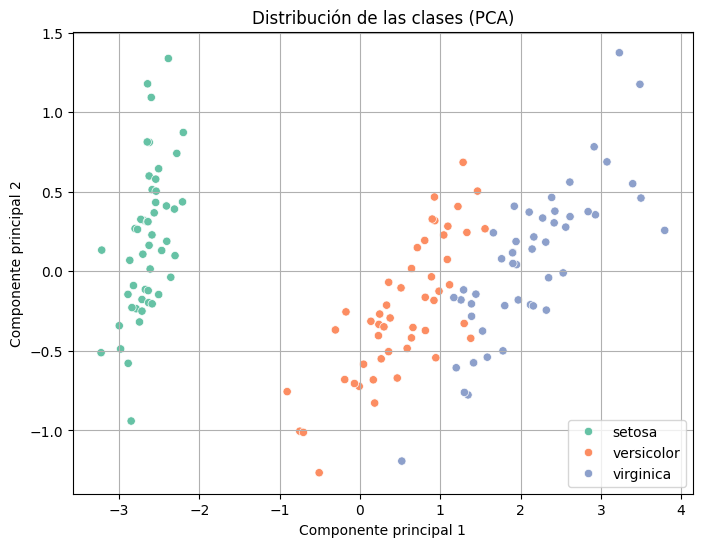

In [1]:
# Paso 1: Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 2: Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Paso 3: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Paso 4: Entrenar modelo
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Paso 5: Evaluar modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Paso 6: Visualización de clases con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=[target_names[i] for i in y], palette="Set2")
plt.title("Distribución de las clases (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()



## 🧾 Interpretación de resultados del modelo (Clasificación multiclase)

Luego de entrenar nuestro modelo de clasificación multiclase usando el dataset **Iris**, obtuvimos los siguientes resultados:

---

### 🎯 **Exactitud (Accuracy)**

> `Accuracy: 0.8947` (≈ 89%)

Esto significa que el modelo clasificó correctamente el 89% de las flores del conjunto de prueba. Si bien es un buen resultado, veremos que hay diferencias en el rendimiento según la clase.

---

### 📊 **Matriz de confusión**

```
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
```

Esta matriz nos permite analizar los errores y aciertos del modelo para cada clase:

* **Fila 1 (Setosa)**: Las 12 muestras de *setosa* fueron clasificadas correctamente. ✅
* **Fila 2 (Versicolor)**: 12 fueron clasificadas correctamente como *versicolor*, pero 1 fue confundida como *virginica*. ⚠️
* **Fila 3 (Virginica)**: 10 fueron clasificadas correctamente, pero 3 fueron confundidas como *versicolor*. ⚠️

👉 Las clases *versicolor* y *virginica* presentan mayor confusión entre sí. Esto tiene sentido, ya que son las dos especies más similares dentro del conjunto de datos.

---

### 📄 **Reporte de clasificación**

Este reporte nos ofrece métricas más detalladas por clase:

| Clase          | Precision | Recall | F1-score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| **Setosa**     | 1.00      | 1.00   | 1.00     | 12      |
| **Versicolor** | 0.80      | 0.92   | 0.86     | 13      |
| **Virginica**  | 0.91      | 0.77   | 0.83     | 13      |

* **Precision**: Qué tan preciso fue el modelo al predecir una clase (falsos positivos).
* **Recall**: Qué tan bien detectó todas las muestras reales de una clase (falsos negativos).
* **F1-score**: Promedio balanceado entre precisión y recall.

📌 Observaciones:

* *Setosa* tiene valores perfectos: es la más fácil de clasificar.
* *Versicolor* y *Virginica* tienen valores más bajos, lo que indica que son más difíciles de distinguir.
* El **promedio ponderado (weighted avg)** de F1-score es **0.89**, similar al accuracy general.

---

### 🌈 Visualización con PCA

La visualización final muestra los datos en un plano bidimensional usando **Análisis de Componentes Principales (PCA)**. Esto nos ayuda a ver cómo están distribuidas las clases y por qué el modelo puede confundir algunas de ellas:

* Las flores *setosa* están claramente separadas de las otras dos.
* *Versicolor* y *virginica* tienen regiones superpuestas, lo que explica los errores del modelo.

---

✅ **Conclusión**

Este ejercicio muestra cómo adaptar el flujo de trabajo de clasificación a un problema multiclase y cómo interpretar los resultados. Aprendimos que no solo importa la accuracy, sino también entender en qué clases el modelo tiene más dificultades. Además, vimos cómo la visualización ayuda a explicar los errores de predicción.

---



### 🛠️ Mejorando la matriz de confusión

La matriz de confusión es una herramienta esencial para evaluar el rendimiento de un modelo de clasificación. Sin embargo, su forma estándar como arreglo numérico puede dificultar la interpretación, especialmente en problemas de clasificación multiclase.

Para interpretarla correctamente es importante **conocer el orden de las clases**. Esto se puede obtener desde los datos reales (`y_test`) utilizando `np.unique()` o desde el objeto `model.classes_` si el modelo lo permite.

A continuación, convertimos la matriz de confusión en una tabla con etiquetas claras en filas y columnas, utilizando `pandas` y `seaborn` para una visualización más comprensible.


Accuracy: 0.9210526315789473

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



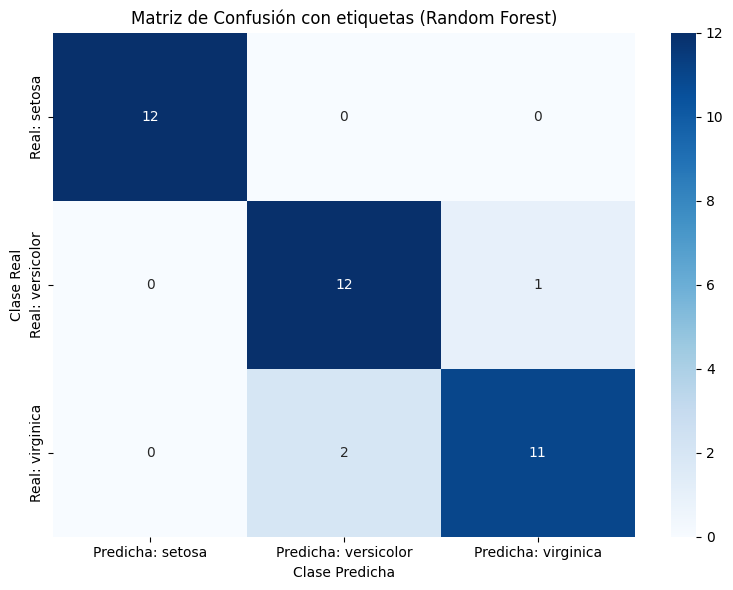

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Cargamos el dataset Iris
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names  # ['setosa', 'versicolor', 'virginica']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Entrenamos un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=class_names))

# Obtenemos el orden correcto de las clases
labels = np.unique(y_test)

# Matriz de confusión cruda
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Convertimos a DataFrame con nombres
cm_df = pd.DataFrame(cm, index=[f"Real: {name}" for name in class_names],
                        columns=[f"Predicha: {name}" for name in class_names])

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión con etiquetas (Random Forest)")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.tight_layout()
plt.show()


---

Este enfoque hace mucho más fácil **identificar rápidamente aciertos y errores**, sobre todo cuando se está aprendiendo clasificación por primera vez.
